## Student Name: Natalie Langford

---
# Tutorial 1 - Part A: Descriptive statistics

All the parts that require action (either in the code or equations) are flagged by `<your turn>` or $\color{red}{<your~turn>}$

In [ ]:
import numpy as np
import scipy.stats as st
from scipy.optimize import fsolve
from scipy.integrate import quad
import matplotlib.pylab as plt
import matplotlib.colors as colors

# Setting plot fonts
plt.rc('font', family='serif')

# Below is a set of colors for matplotlib that is color-vision-defiency friendly.
# To use them in plotting commands, you can simply set "color=colorset[N]",
# where N is an integer in [0,16), reflecting the index of the colors below.
colorset = ['#000000','#00270C','#00443C','#005083',
            '#034BCA','#483CFC','#9C2BFF','#EB24F4',
            '#FF2DC2','#FF4986','#FF7356','#FFA443',
            '#EBD155','#D3F187','#D7FFC8','#FFFFFF']

## Properties of PDFs

We are going to define an arbitrary function which may be a PDF and study its properties.

In [ ]:
def my_pdf(x, a):
    """
    x: independent variable

    a: a shape parameter
    """
    return 2 * st.norm.pdf(x) * st.norm.cdf(a*x)

Assume $a=-10$ and perform the following analyses.

### Plot the PDF.

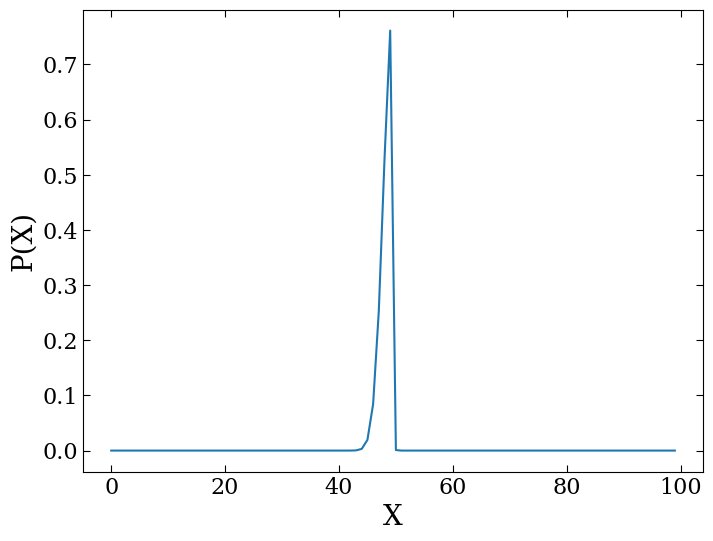

In [31]:
# <your turn> : define variables and calculations you may need here.
x = np.linspace(-30, 30, 100)
y = my_pdf(x,-10)


# Initiating the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
# <your turn> : add your plotting commands here.
ax.plot(y)


# Plot cosmetics - feel free to edit.
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('P(X)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True);

### Use the Kolomogrov axioms and show that the function defined above can be a PDF.

In [29]:
# <your turn>

#1 P(A)>=0 for each A
print(y<0)

#2 P(S)=1 (area = 1)
quad(my_pdf, -10, 10, args=(-10))

#3


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


(1.0, 7.68345531942519e-10)

### Calculate the expectation value, standard deviation, kurtosis, skewness, mode, median and 95% quantile.

*Note*: Define each as a python function of $a$. This will allow easier comparison and test later on.

#### Expectation value

In [57]:
# <your turn>
def integrand(x,a):
    return my_pdf(x,a) * x

def expectation_value(a):
    # <your turn> : define the function so that it would return a number
    # integrand = lambda x: x * my_pdf(x, a) -> can also do this way

    return quad(integrand, -10, 10, args=(-10))[0]

print('mu:',expectation_value(-10))

mu: -0.7939248114932145


#### Standard Deviation

In [70]:
# <your turn>
def integrand2(x,a, e):
  return (x-e)**2 * my_pdf(x,a)

def standard_deviation(a):
    # <your turn> : define the function so that it would return a number
    e = expectation_value(-10)

    return (quad(integrand2, -10, 10, args=(-10, e))[0])**(0.5)

print('sigma:',standard_deviation(-10))

sigma: 0.6080159485535425


#### Skewness

In [69]:
# <your turn>
def integrand3(x,a,e,s):
  return ((x-e)/s)**3 * my_pdf(x,a)#((x-expectation_value(a))/standard_deviation(a))**3 * my_pdf(x,a)

def skewness(a):
    # <your turn> : define the function so that it would return a number
    e = expectation_value(-10)
    s = standard_deviation(-10)


    return quad(integrand3, -10, 10, args=(-10, e, s))[0]

print('skewness:', skewness(-10))

skewness: -0.9555570924911101


#### Kurtosis

In [71]:
# <your turn>
def integrand4(x,a,e,s):
  return ((x-e)/s)**4 * my_pdf(x,a)

def kurtosis(a):
    # <your turn> : define the function so that it would return a number
    e = expectation_value(-10)
    s = standard_deviation(-10)

    return (quad(integrand4, -10, 10, args=(-10, e, s))[0] -3)

print('kurtosis:', kurtosis(-10))

kurtosis: 0.823243537718338


#### Mode

In [75]:
# <your turn>

def mode(a):
    # <your turn> : define the function so that it would return a number
    x = np.linspace(-10,10,10000)
    y = my_pdf(x,a)
    max_index = np.argmax(y)

    return x[max_index]

print('mode:', mode(-10))

mode: -0.2370237023702373


#### Median and 95% quantile

*hint: the same function can do both. Define it as a function of $a$ and $q$ (quantile)*

In [82]:
# <your turn>
def int_pdf(x_uplim, a, q):
    return quad(my_pdf, -10, x_uplim, args=(a))[0] - q

def quantile(a, q):
    # <your turn> : define the function so that it would return a number
    fsolve(int_pdf, x0=1, args=(a,q))
    return

print('median:', quantile(-10,0.5))
print('95%:', quantile(-10,0.95))

median: None
95%: None


/tmp/ipython-input-82-4253640745.py:7: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  fsolve(int_pdf, x0=1, args=(a,q))


#### Now let's replot the PDF and the mean, median and mode values.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


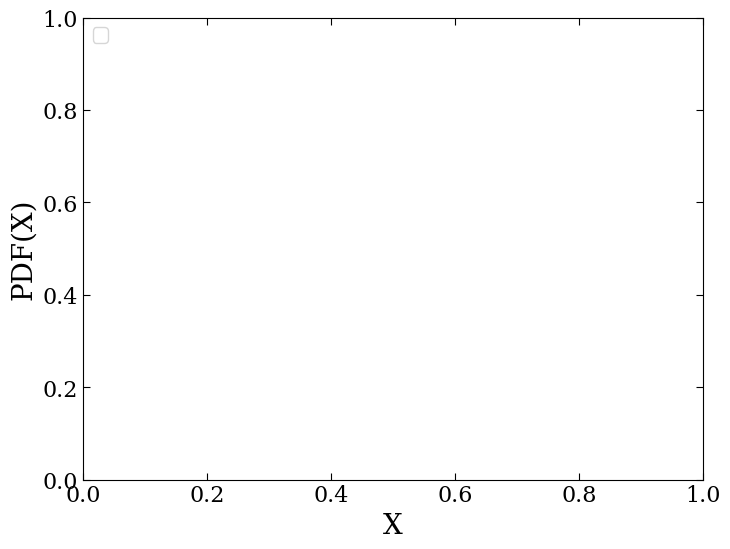

In [ ]:
test_a = -10

# <your turn> : define variables and calculations you may need here.



# Initiating the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
# <your turn> : add your plotting commands here.
# Note: use the keyword "label" to name them. This allows the legend command to produce a clear legend.






# A special addition: We're going to print the value of a and function's skewness on the plot
if type(skewness(test_a)) == float:
    ax.text(-5,0.5,f'a = {test_a}',fontsize=14)
    ax.text(-5,0.45,f'Skewness = {skewness(test_a):.2}',fontsize=14)

# Plot cosmetics - feel free to edit.
ax.legend(loc=2,fontsize=14)
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('PDF(X)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True);

#### Rerun the last cell, with different values of a and check how Mean, Mode, Median and skewness vary.

## You can now save the notebook and download it.